In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [13]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [14]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.803102,-0.158505,0.797448,1.510628,2.129951,1
1,1.509928,1.475186,-3.388981,1.338694,2.528564,0
2,2.046659,-0.971493,2.363523,1.209100,-0.981416,1
3,2.824993,-2.891271,0.379325,0.425193,-0.014415,1
4,1.370822,1.281594,2.609021,1.136674,1.390930,1


In [24]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [72]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    # Target column ko leni ke liye ye changes kiye h
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df
#     return df[cols]

In [74]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [75]:
df1 =sample_rows(df,0.3)

In [76]:
df2 =sample_rows(df,0.3)

In [77]:
df3 =sample_rows(df,0.3)

In [78]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [79]:
df3

,col1,col2,col3,col4,col5,target
10,1.750688,-2.933560,0.201857,0.026178,-1.105157,1
19,-0.366842,-0.060232,0.430834,-2.638945,1.275731,0
91,1.219002,-0.359833,1.395422,0.250591,0.947921,1
30,0.926071,3.153036,-2.801278,0.791126,0.821401,0
84,-0.199772,-1.104749,1.057973,1.343040,-0.529280,1
53,1.942710,-1.342256,0.513022,-0.514728,1.894947,1
40,1.786333,-2.237371,0.327245,-0.927684,-0.592661,1
55,2.448138,0.407401,1.288691,-0.069260,3.203983,1
55,2.448138,0.407401,1.288691,-0.069260,3.203983,1
44,2.862564,-0.346197,1.214956,-3.397840,0.020261,0


In [80]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [81]:
# NOTE 
# 1 ham e jab column sampling karenge to hame yha column dik se pass krne honge
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])   
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [82]:
from sklearn.tree import plot_tree

[Text(200.88000000000002, 190.26, 'X[3] <= -0.145\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(133.92000000000002, 135.9, 'X[1] <= -0.701\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.998\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

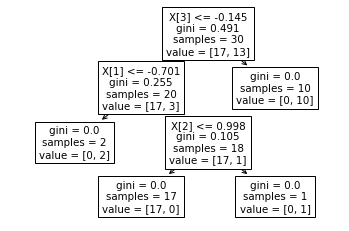

In [83]:
plot_tree(clf1)

[Text(133.92000000000002, 181.2, 'X[3] <= -0.154\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= -1.744\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

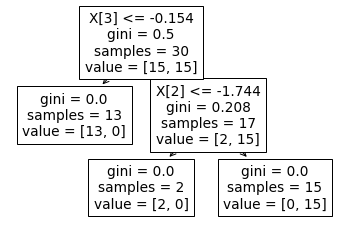

In [84]:
plot_tree(clf2)

[Text(167.4, 181.2, 'X[2] <= 0.171\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(83.7, 108.72, 'X[1] <= -1.584\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(251.10000000000002, 108.72, 'X[3] <= -1.376\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

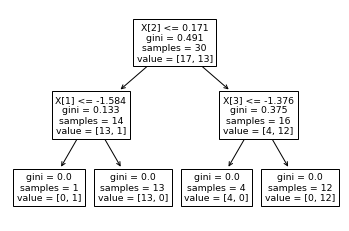

In [85]:
plot_tree(clf3)

In [65]:
clf1.predict(np.array([0.103599,1.44,1.002247,0.713961,3.673162]).reshape(1,5))

array([1])

In [67]:
clf2.predict(np.array([0.103599,1.44,1.002247,0.713961,3.673162]).reshape(1,5))

array([1])

In [69]:
clf3.predict(np.array([0.103599,1.44,1.002247,0.713961,3.673162]).reshape(1,5))   

# yah hamre three model bol rhe new data point ke liye ke dino 1 

array([1])

In [70]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
61,0.563247,0.555581,-1.421943,-0.585759,1.583852,0
94,2.377510,0.077633,-0.181872,-1.506541,0.536248,0
55,2.448138,0.407401,1.288691,-0.069260,3.203983,1
65,0.453227,0.529041,0.310028,-2.356507,0.416574,0
34,1.500942,-1.324581,1.036459,1.359007,-0.039444,1
17,0.287359,0.480130,2.720665,0.876292,-0.449912,1
16,0.248320,-2.439774,0.444997,3.225542,0.611991,1
43,1.437581,-0.396884,0.096587,-3.518312,2.274421,0
84,-0.199772,-1.104749,1.057973,1.343040,-0.529280,1
1,1.509928,1.475186,-3.388981,1.338694,2.528564,0
